In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import gym
import mo_gym

from pymove.tabular_q_learning import TabularQLearning, TabularQLambda
from pymove.scalarizations import WeightedScalarization, ELA, SFLLA, vELA, vSFLLA
from pymove.order_operators import ScalarizingOrderOperator, LexicographicOrderOperator
from pymove.exploration import SoftmaxExploration, EpsilonGreedy

import time

In [4]:
env = gym.make("deep-sea-treasure-v0")
env.num_objectives = np.prod(env.reward_space.shape)
env.num_actions = env.action_space.n
env.num_observations = 100
def get_obs_idx(obs):
    multi_index = np.array([[obs[0]], [obs[1]]])

    return np.ravel_multi_index(multi_index, (10, 10))
env.get_obs_idx = get_obs_idx


# parameters
num_episodes = 100
eps = 0.05
eps_decay = 0.995

# Linear
#lin_expp = SoftmaxExploration(env, ranking_method="tournament")
lin_expp = EpsilonGreedy(env, epsilon=eps, decay_type="exp", decay_params={"decay_rate": eps_decay})
tq_algo_lin = TabularQLearning(env, num_episodes=num_episodes, exploration_policy=lin_expp)

# LIN Q(lambda)
lin_expp2 = EpsilonGreedy(env, epsilon=eps, decay_type="exp", decay_params={"decay_rate": eps_decay})
tql_algo_lin = TabularQLambda(env, num_episodes=num_episodes, exploration_policy=lin_expp2)

# LO
LO_op = LexicographicOrderOperator(objective_order=[0, 1])
LO_expp = EpsilonGreedy(env, epsilon=0.1, decay_params={"decay_rate": 0.9999}, order_operation=LO_op)
tq_algo_lo = TabularQLearning(env, alpha=0.01, num_episodes=num_episodes, exploration_policy=LO_expp)


Finished Linear, tabular Q in 0.03s
Mean returns: [ 2.79999995 -4.09      ]
Finished Linear, tabular Q(Lambda) in 0.07s
Mean returns: [ 2.98299995 -4.13      ]


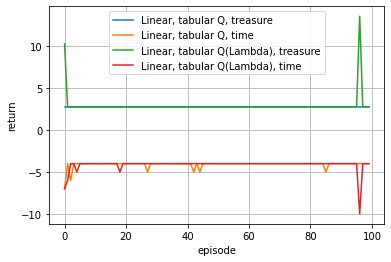

In [8]:
algo_dict = {
        "Linear, tabular Q": tq_algo_lin,
        "Linear, tabular Q(Lambda)": tql_algo_lin,
        #"LO, tabular Q": tq_algo_lo
        }

plt.figure()
for (label, algo) in algo_dict.items():
    t_start = time.time()
    algo.learn()
    print(f"Finished {label} in {time.time() - t_start:.2f}s")
    print(f"Mean returns: {algo.returns.mean(axis=1)}")
    plt.plot(algo.returns[0, :], label=label+", treasure")
    plt.plot(algo.returns[1, :], label=label+", time")
plt.xlabel("episode")
plt.ylabel("return")
plt.grid()
plt.legend()
plt.show()